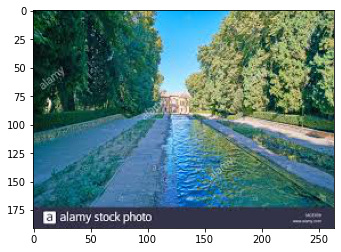

In [1]:
import mahotas as mh
import numpy as np
import matplotlib.pyplot as plt
original_img=np.array(mh.imread('/home/anu/Downloads/garden.jpeg'),dtype=np.float64)/255
#done scaling using 255 division
plt.imshow(original_img)


In [6]:
original_img.shape

orig_dimension=tuple(original_img.shape)
orig_dimension



(191, 264, 3)

In [7]:
width,height,depth=orig_dimension
width



191

In [9]:
#converting 3d img data to 2dimenion

img_flattened=np.reshape(original_img,(width*height,depth))
img_flattened.shape

(50424, 3)

In [10]:
from sklearn.utils import shuffle

img_array=shuffle(img_flattened,random_state=40)[:1000]#taking only 1000 values from 50424
img_array.shape

(1000, 3)

In [13]:
#out of 5042, taking 1000

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
model=KMeans(n_clusters=64,random_state=42)
#n_cluster denotes most important 64 colors only represents here, 

#recreating the image here using image quantization

model.fit(img_array)
cluster_preds=model.predict(img_flattened)
compressed_palette=model.cluster_centers_
compressed_palette

array([[0.04232026, 0.25784314, 0.25392157],
       [0.48431373, 0.64362745, 0.68088235],
       [0.19248366, 0.47973856, 0.4245098 ],
       [0.21411765, 0.73921569, 0.97764706],
       [0.47285068, 0.51628959, 0.32217195],
       [0.7751634 , 0.80196078, 0.59411765],
       [0.65931373, 0.89411765, 0.98137255],
       [0.29827451, 0.48698039, 0.66886275],
       [0.01568627, 0.17843137, 0.09455338],
       [0.6033406 , 0.64270153, 0.41902687],
       [0.19066293, 0.19296608, 0.27370059],
       [0.97333333, 0.93803922, 0.91607843],
       [0.08779956, 0.42135076, 0.43464052],
       [0.17916667, 0.44485294, 0.32769608],
       [0.46666667, 0.47385621, 0.49869281],
       [0.05245098, 0.40784314, 0.72892157],
       [0.33050109, 0.38082789, 0.20043573],
       [0.88666667, 0.80431373, 0.7427451 ],
       [0.1727451 , 0.43098039, 0.59745098],
       [0.39956427, 0.57407407, 0.74095861],
       [0.41372549, 0.69215686, 0.96078431],
       [0.07664884, 0.20802139, 0.18573975],
       [0.

In [14]:
compressed_palette.shape

(64, 3)

In [17]:
64*3

192

In [15]:
cluster_preds

array([32, 21, 32, ..., 10, 10, 10], dtype=int32)

In [16]:
#recreating the image here using compressed palette
#here creating an empty 0 matrix in the same size of original image here
comp_img=np.zeros((width,height,compressed_palette.shape[1]))
comp_img.shape

(191, 264, 3)

In [18]:
#using 191, 264
#191*264

50424

In [20]:
label_index=0
for i in range(width):
    for j in range(height):
        
        comp_img[i][j]=compressed_palette[cluster_preds[label_index]]
        label_index+=1

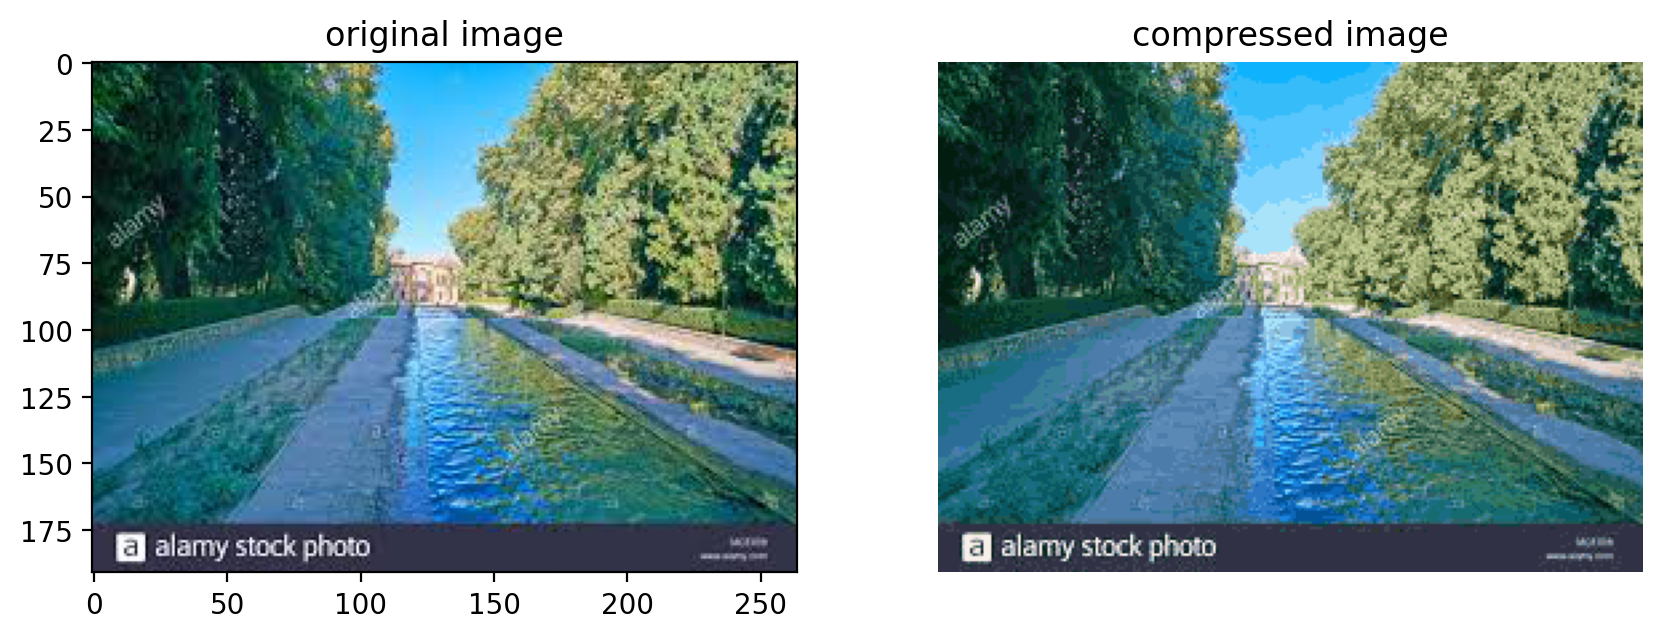

In [23]:
from matplotlib.pyplot import figure
figure(figsize=(10,10),dpi=200)

plt.subplot(121)
plt.title('original image')
plt.imshow(original_img)

plt.subplot(122)
plt.title('compressed image')

#image is compressed here by taking 1000 values randomly from 50424 dimensions,and from this 1000 values, takes here 64 values(dimensions) to create this color palette
plt.axis('off')
plt.imshow(comp_img)
plt.show()
